In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_004.nc')
t0 = 60 # Start from day 30
tn = len(state0.T) # End day
state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction

In [3]:
Hs = 12
Qf = 700
X = state.X.data
x_dist = X / 1000
depth = state.Z.data

u0 = state.U.data # dims = T, Z, Y, Xp1
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u = u_ymean.mean(0) # dims = Z, X
u[u==0] = np.nan
u_x = np.gradient(u, X, axis=1)
adv = u * u_x

#u1[1,:] = np.gradient(u1[1,:], X)
#u2 = np.gradient(u1, X, axis=1)
#np.gradient(u1[0,:], X), u2
x_dist[28]

5.7

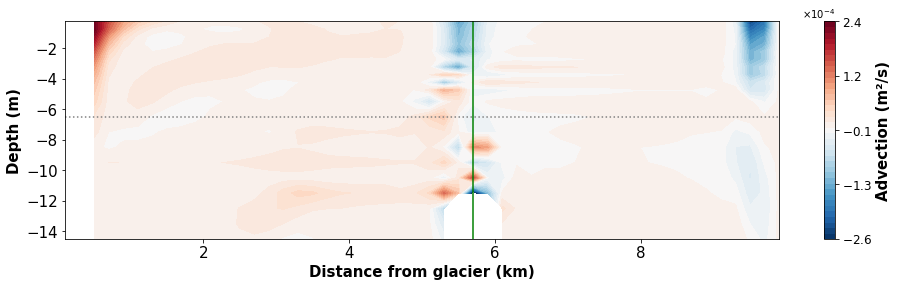

In [4]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/Advection/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/FrPseries/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig, ax = plt.subplots(figsize=(16,4)) 
ca = np.linspace(-2.6e-4,2.4e-4,40) # Contour range for advection
# Plot advection field
plt.contourf(x_dist,depth[:20], adv[:20,:], ca, cmap='RdBu_r')
ax.axvline(x_dist[28],color='g')
ax.axhline(y=-6.5,color='gray', linestyle=':')

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

cbar = plt.colorbar(ticks=np.linspace(-2.6e-4,2.4e-4,5), format=OOMFormatter(-4, mathText=True))
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Advection (m\u00B2/s)', size=15, weight='bold')

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
ax.set_xlabel('Distance from glacier (km)', size = 15, weight = 'bold')
ax.set_ylabel('Depth (m)', size = 15, weight = 'bold')

fig.savefig(fig_path + '/Qf' + str(Qf) + '.png', dpi = 150, bbox_inches='tight')